In [1]:
import json,csv
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt

In [2]:
with open('user.json', encoding='utf-8') as f:
    iter_f = iter(f)
    line = f.readline()
    user = []
    for line in iter_f: 
        d = json.loads(line)
        user.append(d)
    f.close()


In [4]:
with open('business.json', encoding='utf-8') as f:
    iter_f = iter(f)
    line = f.readline()
    businesscategory = []
    for line in iter_f: 
        d = json.loads(line)
        businesscategory.append(d["categories"])
    f.close()

In [5]:
len(set(businesscategory))

93386

# Get all the pizza restaurants and rank by the number of restaurants and select the top 10 

In [42]:
pizzainfo = {}
with open('business.json', encoding='utf-8') as f:
    iter_f = iter(f)
    line = f.readline()
    for line in iter_f: 
        d = json.loads(line)
        if d["categories"] is not None:
            cate=d["categories"].replace(", ",",").split(",")
            if "Pizza" in cate:
                if d["name"] not in pizzainfo:
                    pizzainfo[d["name"]]=[1,d["categories"]]
                else:
                    pizzainfo[d["name"]][0]+=1
    f.close()
    

In [43]:
pizzainfo=sorted(pizzainfo.items(),key=lambda x:x[1][0],reverse=True)
pizzainfo[:3]  ##Take first 3 as an example


[('Pizza Hut', [320, 'Restaurants, Italian, Pizza, Fast Food, Chicken Wings']),
 ("Domino's Pizza",
  [209, 'Pizza, Caterers, Restaurants, Event Planning & Services']),
 ("Papa John's Pizza", [152, 'Pizza, Restaurants'])]

In [8]:
DataFrame.to_csv(DataFrame(pizzainfo)[:10],"Pizzatop10count.csv")


In [9]:
%matplotlib inline

Text(0.5,0,'Restaurant count')

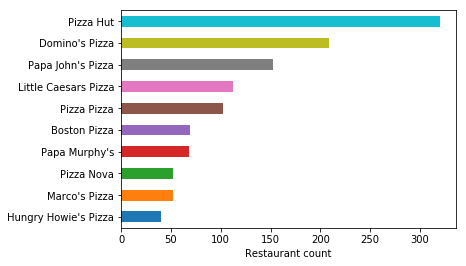

In [10]:
##Draw the plot for the number of the pizza restaurants in the whole dataset for top 10
count={}
for restaurant in pizzainfo:
    count[restaurant[0]]=restaurant[1][0]
count10=Series(count)[:10]
count10.sort_values().plot.barh()
plt.xlabel("Restaurant count",fontsize=10)



In [11]:
##Get the top 10 pizza chain restaurants' names
pizzaname10=[x[0] for x in pizzainfo][:10]
pizzaname10


['Pizza Hut',
 "Domino's Pizza",
 "Papa John's Pizza",
 'Little Caesars Pizza',
 'Pizza Pizza',
 'Boston Pizza',
 "Papa Murphy's",
 "Marco's Pizza",
 'Pizza Nova',
 "Hungry Howie's Pizza"]

In [12]:
#Get the GPS(location) for the top10 pizza restaurants
gps={}
with open('business.json', encoding='utf-8') as f:
    iter_f = iter(f)
    line = f.readline()
    for line in iter_f: 
        d = json.loads(line)
        for name in pizzaname10:
            if name not in gps and d["name"]==name:
                gps[name]=[(d["latitude"],d["longitude"])]
            elif name in gps and d["name"]==name:
                gps[name].append((d["latitude"],d["longitude"]))
    f.close()


In [13]:
gpsseries=Series(gps)


In [14]:

DataFrame.to_csv(DataFrame(gpsseries),"TOP10 pizza restaurant GPS.csv")


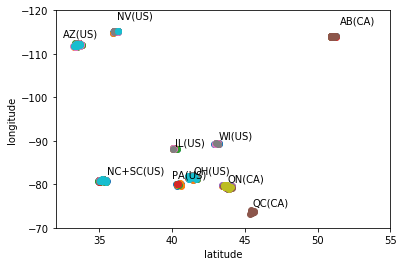

In [15]:
##Get a draft map of the top10 pizza restaurants
for i in range (len(pizzaname10)):
    x=[x[0] for x in gps[pizzaname10[i]]]
    y=[y[1] for y in gps[pizzaname10[i]]]
    plt.scatter(x,y,label=pizzaname10[i])
    plt.axis([32,55,-70,-120])
plt.text(41.5,-82.5,"OH(US)")
plt.text(40,-81.5,"PA(US)")
plt.text(43.8,-80.5,"ON(CA)")
plt.text(40.2,-89,"IL(US)")
plt.text(43.2,-90.5,"WI(US)")
plt.text(35.5,-82.5,"NC+SC(US)")
plt.text(45.5,-75,"QC(CA)")
plt.text(32.5,-114,"AZ(US)")
plt.text(36.2,-118,"NV(US)")
plt.text(51.5,-117,"AB(CA)")
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.show()
    

In [16]:
pizzacountdf=DataFrame({"name":[x[0] for x in pizzainfo],"count":[x[1][0] for x in pizzainfo]})
df=pizzacountdf.set_index("name")

In [45]:
##Reading this csv get the reviews from the users from the top 10 pizza restaurants.
review_user=pd.read_csv("TOP10user.csv")
review_user[:3]

,Unnamed: 0,user_id,business_id
0,0,VJvQiGrmtFXAmswRRIWYYw,fweCYi8FmbJXHCqLnwuk8w
1,1,renPzRDqMZpMaHiCD_e1_A,pif8Io-Jn2veckVGzkEyJw
2,2,txHu-M3p2tLKSpNGMWUO0Q,C2skZUb7BLpv3e78Mcf5cA


In [19]:
##Drop the duplicate users
##(Some users might write different reviews to different restaurants and we only want to get the users' infomation once)
review_usernew=review_user.drop_duplicates('user_id')

# Only select the users that leave reviews in the top 10 pizza restaurants

In [20]:
userdf=DataFrame(user)
userdf['business_id'] = userdf['user_id'].map(review_usernew.set_index('user_id')['business_id'])
#data.isnull().sum(axis=0)
user_top = userdf.loc[userdf['business_id'].isin(list(review_usernew['business_id']))]



In [44]:

usernew=user_top[['user_id','name','average_stars','review_count','fans','yelping_since','fans','cool','funny','useful','compliment_cool','compliment_funny','compliment_plain']]
usernew[:3]


,user_id,name,average_stars,review_count,fans,yelping_since,fans,cool,funny,useful,compliment_cool,compliment_funny,compliment_plain
1,bc8C_eETBWL0olvFSJJd0w,David,3.71,16,0,2013-10-04 00:16:10,0,10,8,28,0,0,0
34,eSlOI3GhroEtcbaD_nFXJQ,Jason,3.61,2518,251,2011-05-28 21:42:38,251,13924,8340,16349,2267,2267,2861
67,e67TGUfNnz04A1Ahd0tF2A,Swapnil,3.11,44,2,2013-08-22 02:55:51,2,6,21,43,0,0,0


In [22]:
##usernew.csv contains the information we will study on , other info like friends aren't included in this csv file
DataFrame.to_csv(usernew,"usernew.csv")


In [23]:
user=pd.read_csv("usernew.csv")




In [25]:
import matplotlib.pyplot as plt

In [26]:
##Choose top 30 users according to the review counts of them
usersort=user.sort_values(by="review_count",ascending=False)
user_top30=usersort[:30]
user_top30=usersort[:30]
user_top30=usersort[:30]
user_top30[:3]  #Show top 3 as an example

,Unnamed: 0,user_id,name,average_stars,review_count,fans,yelping_since,fans.1,cool,funny,useful,compliment_cool,compliment_funny,compliment_plain
37,584,hWDybu_KvYLSdEFzGrniTw,Bruce,3.61,10022,528,2009-03-08 21:47:44,528,61383,49785,74829,2502,2502,2749
400,7022,Hi10sGSZNxQH3NLyWSZ1oA,Fox,3.83,6407,1574,2009-05-26 11:33:58,1574,82128,86122,89418,5429,5429,4379
124,2201,CxDOIDnH8gp9KXzpBHJYXw,Jennifer,3.32,6314,715,2009-11-09 20:44:45,715,12995,8823,20336,1606,1606,3629


In [27]:
##Get the top 30 users' names
user_top30reviewordername=user_top30["name"]
user_top30reviewordername



37          Bruce
400           Fox
124      Jennifer
5748        Sunil
380       Stefany
10175        Greg
1011       Denise
422          Dave
1           Jason
194        Joanna
374          Norm
231          Chad
548         Karen
179             J
1063     Jennifer
370         Chris
5743       Monica
225      Samantha
5753         Lisa
385       Jocelyn
104       Matthew
349           Jim
79          Emily
13966        Sean
461          Brad
328         Stacy
335          Juan
1298         Owen
1121         Nick
40         Amanda
Name: name, dtype: object

# User review sent types and counts plots for top 30 users

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text yticklabel objects>)

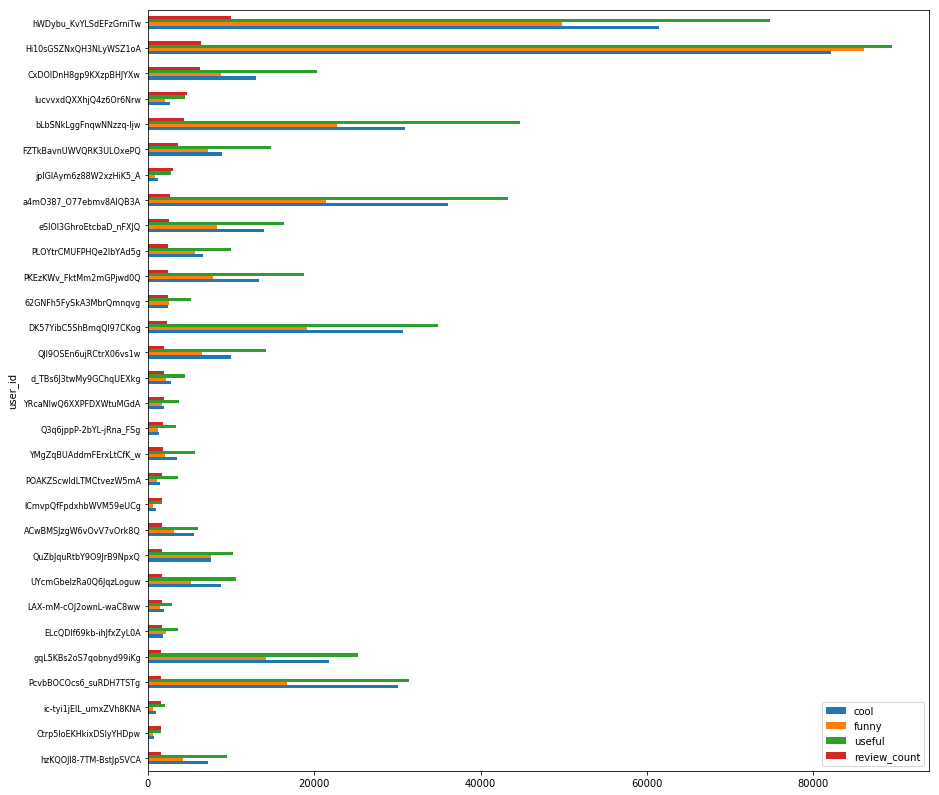

In [46]:
user_top30.groupby(user_top30.user_id)['cool','funny','useful','review_count'].mean().sort_values('review_count', ascending=True).plot(kind='barh',figsize=(14,14), width=0.5)
plt.yticks(fontsize=8)


# User review compliment types and counts plots for top 30 users

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text yticklabel objects>)

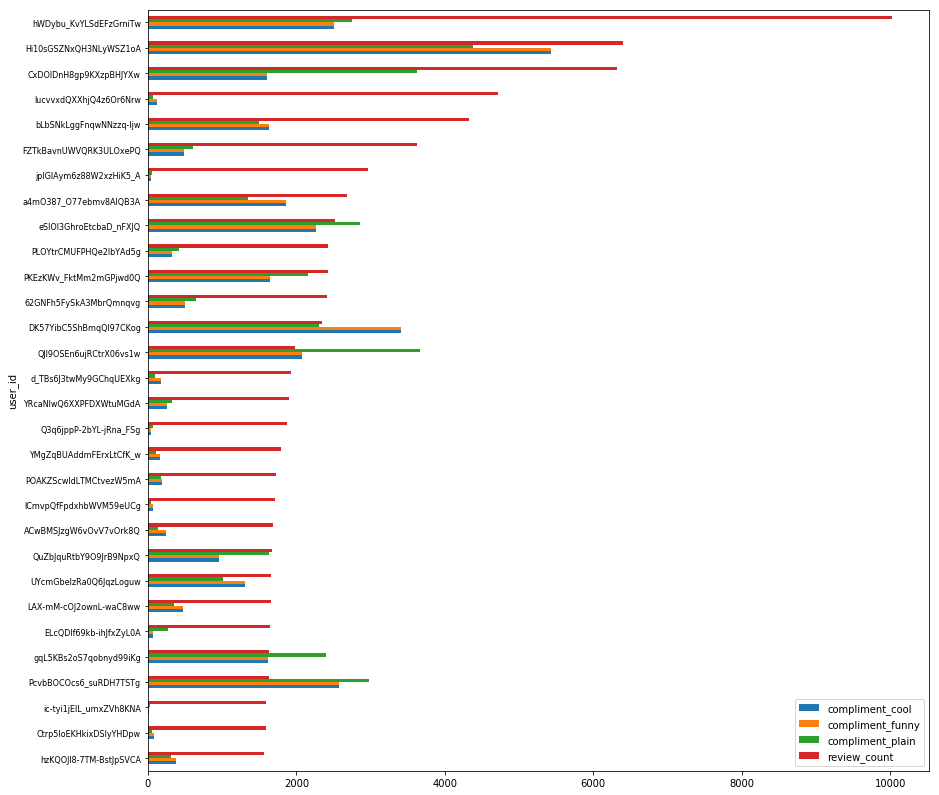

In [29]:
user_top30.groupby(user_top30.user_id)['compliment_cool','compliment_funny','compliment_plain','review_count'].mean().sort_values('review_count', ascending=True).plot(kind='barh',figsize=(14,14), width=0.5)
plt.yticks(fontsize=8)



# User fans and review counts plots for top 30 users

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text yticklabel objects>)

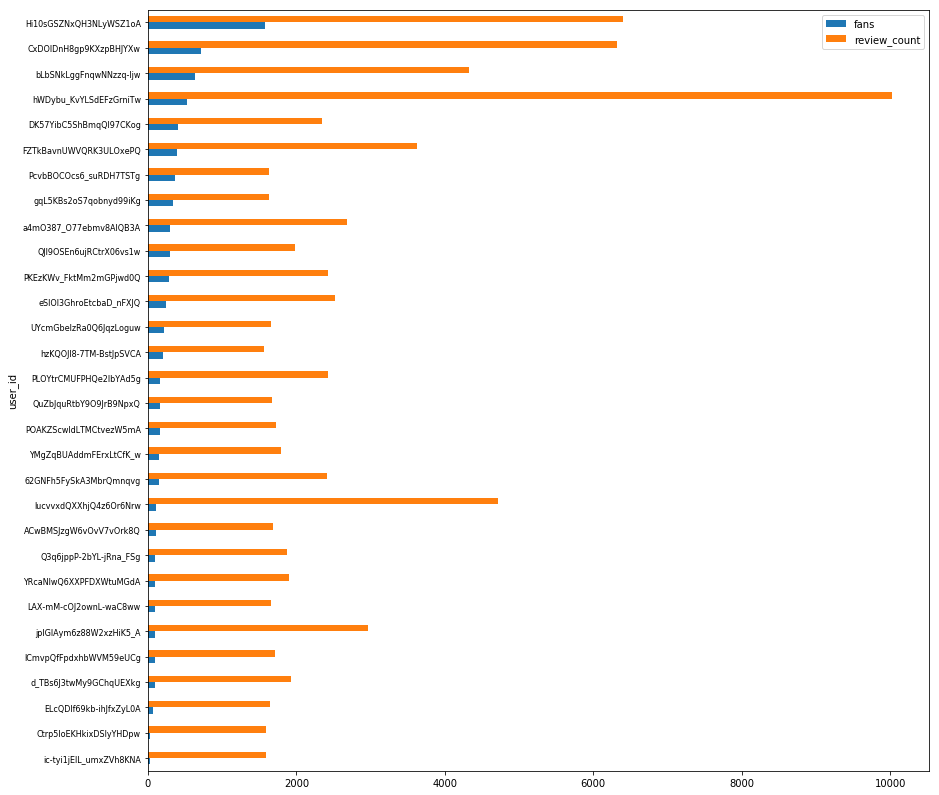

In [30]:
user_top30.groupby(user_top30.user_id)['fans','review_count'].mean().sort_values('fans', ascending=True).plot(kind='barh',figsize=(14,14), width=0.5)
plt.yticks(fontsize=8)


In [31]:
user_top30fansordername=user_top30.sort_values('fans',ascending=False)["name"]
user_top30fansordername


400           Fox
124      Jennifer
380       Stefany
37          Bruce
548         Karen
10175        Greg
335          Juan
328         Stacy
422          Dave
179             J
374          Norm
1           Jason
79          Emily
40         Amanda
194        Joanna
349           Jim
5753         Lisa
225      Samantha
231          Chad
5748        Sunil
104       Matthew
5743       Monica
370         Chris
385       Jocelyn
13966        Sean
1011       Denise
1063     Jennifer
461          Brad
1121         Nick
1298         Owen
Name: name, dtype: object

# Yelp using time for top 30 users Analysis

In [47]:
user_top30timeorder=user_top30.sort_values("yelping_since")
user_top30time=user_top30timeorder["yelping_since"]
user_top30time


231      2004-12-19 20:44:21
548      2006-01-28 01:56:23
179      2007-03-19 18:15:32
385      2007-05-14 18:38:59
349      2007-07-07 11:46:47
1121     2007-09-10 01:46:32
13966    2007-09-28 14:51:24
374      2008-12-12 02:30:13
10175    2008-12-18 08:06:07
5748     2009-01-28 23:35:24
37       2009-03-08 21:47:44
225      2009-03-16 23:41:53
400      2009-05-26 11:33:58
370      2009-06-16 02:39:09
40       2009-09-26 23:14:00
124      2009-11-09 20:44:45
461      2009-11-10 00:10:36
5743     2010-09-11 22:25:03
79       2010-10-18 17:09:38
104      2010-12-16 19:35:05
1063     2010-12-27 20:51:33
194      2011-01-09 22:07:45
1        2011-05-28 21:42:38
380      2011-06-29 14:40:01
5753     2011-11-20 01:05:48
328      2011-12-20 00:01:00
335      2012-08-16 03:11:51
422      2013-06-16 21:32:47
1298     2014-02-19 22:37:38
1011     2015-02-26 17:59:41
Name: yelping_since, dtype: object

In [48]:
from datetime import datetime
dtoday = datetime.strptime('2019-11-01 00:00:00','%Y-%m-%d %H:%M:%S')
daylist=[]
for time in user_top30time:
    d1 = datetime.strptime(time,'%Y-%m-%d %H:%M:%S')
    daylist.append((dtoday - d1).days)

In [49]:
##Get the top 30 users based on their time for using Yelp
user_top30timeorder["days"]=daylist
user_top30timeorder[:3]  ##Take first top 3 as an example
 

,Unnamed: 0,user_id,name,average_stars,review_count,fans,yelping_since,fans.1,cool,funny,useful,compliment_cool,compliment_funny,compliment_plain,days
231,3788,62GNFh5FySkA3MbrQmnqvg,Chad,3.34,2410,150,2004-12-19 20:44:21,150,2364,2489,5240,501,501,645,5429
548,9781,DK57YibC5ShBmqQl97CKog,Karen,3.87,2340,411,2006-01-28 01:56:23,411,30626,19182,34815,3411,3411,2312,5024
179,3025,QJI9OSEn6ujRCtrX06vs1w,J,3.61,1982,293,2007-03-19 18:15:32,293,10043,6533,14163,2083,2083,3670,4609


# User review counts and days they use Yelp

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text yticklabel objects>)

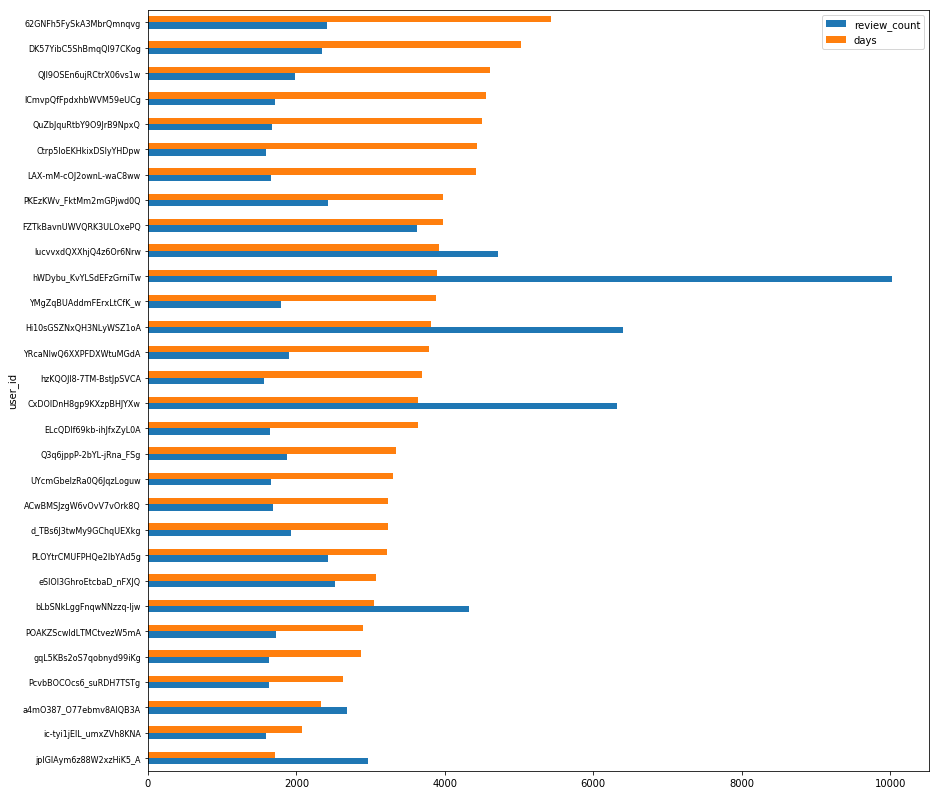

In [36]:
user_top30timeorder.groupby(user_top30.user_id)['review_count','days'].mean().sort_values('days', ascending=True).plot(kind='barh',figsize=(14,14), width=0.5)
plt.yticks(fontsize=8)


In [52]:
##Get the names for the top 30 longest time using Yelp
user_top30timeordername=user_top30timeorder["name"]
user_top30timeordername

231          Chad
548         Karen
179             J
385       Jocelyn
349           Jim
1121         Nick
13966        Sean
374          Norm
10175        Greg
5748        Sunil
37          Bruce
225      Samantha
400           Fox
370         Chris
40         Amanda
124      Jennifer
461          Brad
5743       Monica
79          Emily
104       Matthew
1063     Jennifer
194        Joanna
1           Jason
380       Stefany
5753         Lisa
328         Stacy
335          Juan
422          Dave
1298         Owen
1011       Denise
Name: name, dtype: object